🟢 Step 1: Import Libraries

In [4]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Save model
import joblib


🟢 Step 2: Load Dataset

In [5]:
# Load your dataset (replace path with actual file)
df = pd.read_csv("data.csv")

# Display first few rows
df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


🟢 Step 3: Explore Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
None
                 co            no           no2            o3           so2  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2929.228628     33.660702     66.221299     60.346239     66.693633   
std     2854.523506     62.127118     48.527492     80.464932     49.439191   
min      260.350000      0.000000      4.280000      0.000000      5.250000   
25%     1068.120000      0.680000

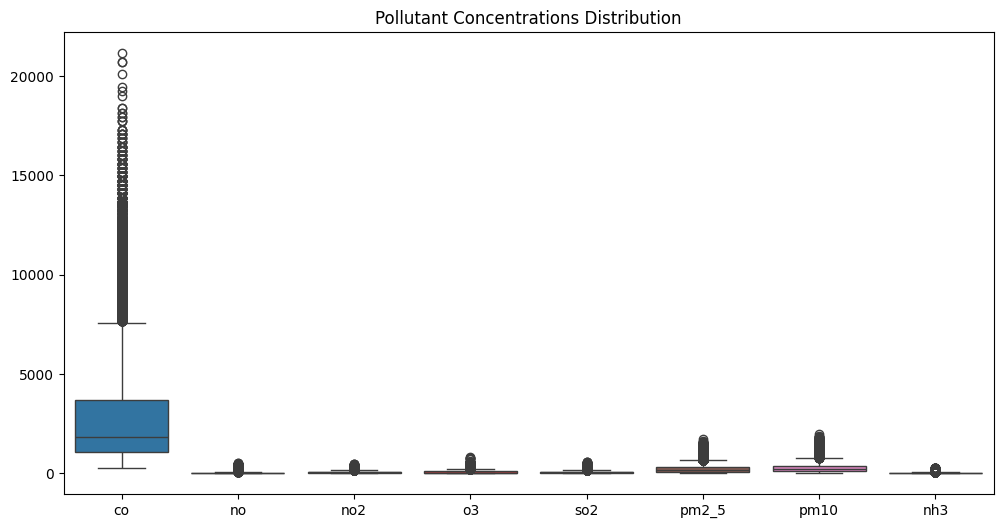

In [6]:
# Check data info
print(df.info())

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Quick visualization of pollutants
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["co","no","no2","o3","so2","pm2_5","pm10","nh3"]])
plt.title("Pollutant Concentrations Distribution")
plt.show()


🟢 Step 4: Define AQI Categories (Rule-based Labels)

We’ll classify AQI using Indian CPCB guidelines (simplified).

In [7]:
# Define a function to compute AQI label from pollutants
def compute_aqi_label(pm25, pm10, no2, o3, so2, co, nh3):
    # Basic ranges for India AQI
    if pm25 <= 30 and pm10 <= 50 and no2 <= 40:
        return "Good"
    elif pm25 <= 60 and pm10 <= 100 and no2 <= 80:
        return "Satisfactory"
    elif pm25 <= 90 and pm10 <= 250 and no2 <= 180:
        return "Moderate"
    elif pm25 <= 120 and pm10 <= 350 and no2 <= 280:
        return "Poor"
    elif pm25 <= 250 and pm10 <= 430 and no2 <= 400:
        return "Very Poor"
    else:
        return "Severe"

# Apply label creation
df["aqi_label"] = df.apply(lambda row: compute_aqi_label(
    row["pm2_5"], row["pm10"], row["no2"], row["o3"], row["so2"], row["co"], row["nh3"]), axis=1)

# Show counts of labels
print(df["aqi_label"].value_counts())


aqi_label
Severe          6193
Very Poor       5376
Moderate        2554
Poor            2157
Satisfactory    2034
Good             462
Name: count, dtype: int64


🟢 Step 5: Prepare Features & Labels

In [8]:
# Features = pollutant concentrations
X = df[["co","no","no2","o3","so2","pm2_5","pm10","nh3"]]

# Labels = AQI categories
y = df["aqi_label"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 15020
Testing samples: 3756


🟢 Step 6: Train Machine Learning Model

We’ll start with Random Forest, a strong baseline for tabular data.

In [9]:
# Train RandomForest
model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9978700745473909


🟢 Step 7: Evaluate Model

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        92
    Moderate       1.00      1.00      1.00       511
        Poor       0.99      1.00      0.99       432
Satisfactory       1.00      1.00      1.00       407
      Severe       1.00      1.00      1.00      1239
   Very Poor       1.00      1.00      1.00      1075

    accuracy                           1.00      3756
   macro avg       1.00      1.00      1.00      3756
weighted avg       1.00      1.00      1.00      3756



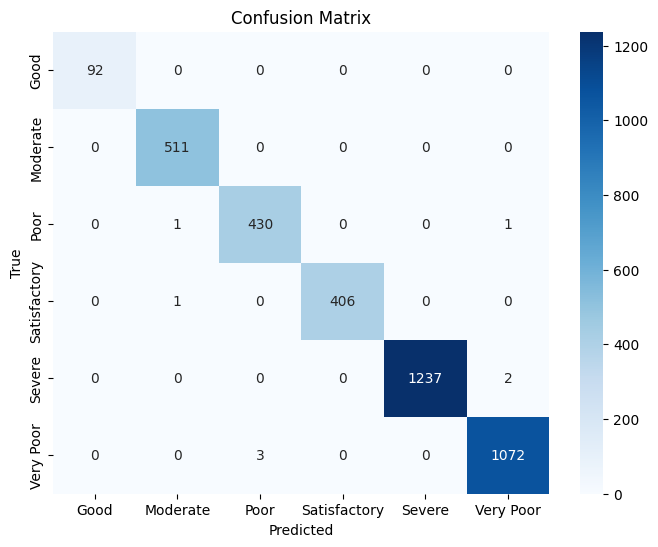

In [10]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


🟢 Step 8: Feature Importance

/tmp/ipython-input-1506466611.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=importance_df, palette="viridis")


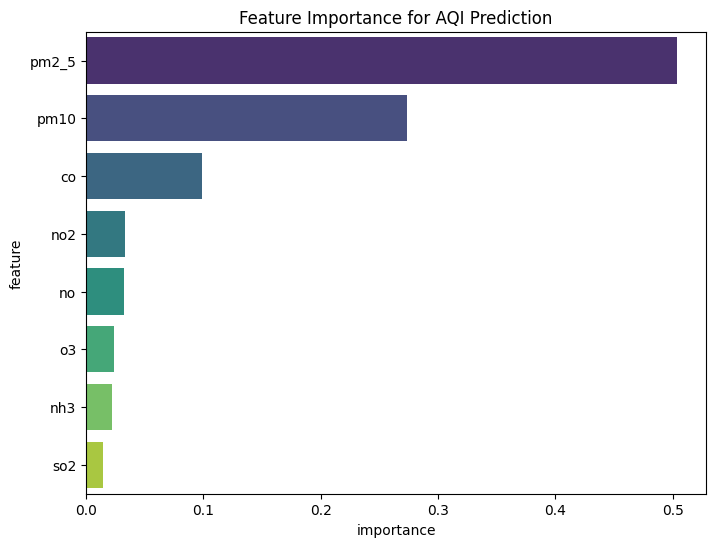

In [11]:
# Check which pollutants matter most
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"feature": features, "importance": importances}).sort_values(by="importance", ascending=False)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x="importance", y="feature", data=importance_df, palette="viridis")
plt.title("Feature Importance for AQI Prediction")
plt.show()


🟢 Step 9: Save Model

In [12]:
# Save model for backend API
joblib.dump(model, "aqi_classifier.pkl")
print("Model saved as aqi_classifier.pkl")


Model saved as aqi_classifier.pkl


🟢 Step 10: Deploy Backend API (FastAPI)

This is the AI service that Arduino/Frontend will call.

In [13]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

# Load trained model
model = joblib.load("aqi_classifier.pkl")

# Define API
app = FastAPI()

class PollutionData(BaseModel):
    co: float
    no: float
    no2: float
    o3: float
    so2: float
    pm2_5: float
    pm10: float
    nh3: float

@app.post("/predict")
def predict(data: PollutionData):
    X = [[data.co, data.no, data.no2, data.o3, data.so2, data.pm2_5, data.pm10, data.nh3]]
    prediction = model.predict(X)[0]
    return {
        "aqi_category": prediction,
        "message": "Air Quality: " + prediction
    }


🟢 Step 11: (Optional) Forecasting Extension

We will add later add LSTM (deep learning) to predict pollutant values for future hours → then compute AQI forecast.

✅ This notebook gives you:

Full exploration of your dataset.

AQI labeling logic.

ML training + evaluation.

Model deployment as API.

Ready to connect with Arduino/CarbonX system.

In [27]:
@app.post("/predict")
def predict(data: PollutionData):
    # Convert input to DataFrame with correct feature names
    X = pd.DataFrame([{
        "co": data.co,
        "no": data.no,
        "no2": data.no2,
        "o3": data.o3,
        "so2": data.so2,
        "pm2_5": data.pm2_5,
        "pm10": data.pm10,
        "nh3": data.nh3
    }])

    # Predict category
    prediction = model.predict(X)

    # Convert numpy type to plain Python string
    category = prediction[0].item() if hasattr(prediction[0], "item") else str(prediction[0])

    return {
        "aqi_category": category,
        "status": "success",
        "message": f"Predicted AQI Category: {category}"
    }


In [29]:
sample = pd.DataFrame([{
    "co": 0.4,
    "no": 10,
    "no2": 25,
    "o3": 40,
    "so2": 8,
    "pm2_5": 55,
    "pm10": 90,
    "nh3": 15
}])

pred = model.predict(sample)

# Safe handling whether it's numpy type or str
category = pred[0] if isinstance(pred[0], str) else pred[0].item()

print("Predicted AQI Category:", category)


Predicted AQI Category: Satisfactory


We’ll use an Isolation Forest model (a classic anomaly detector) trained on your dataset.

🔹 Step 1: Train the Fraud Detector

In [32]:
# Code Cell 1 - Train Fraud Detector
from sklearn.ensemble import IsolationForest
import pandas as pd

# Load dataset
df = pd.read_csv("data.csv")

# Features (same as monitoring model)
features = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
X = df[features]

# Train anomaly detector
fraud_model = IsolationForest(contamination=0.05, random_state=42)
fraud_model.fit(X)

print("✅ Fraud detector trained.")


✅ Fraud detector trained.


🔹 Step 2: Check If a New Sample is Fraud or Not

In [42]:
# Code Cell 2 - Fraud Check
# Example sample (replaced with the sensor values)
sample = [[0.5, 0.1, 20, 15, 4, 35, 60, 2]]
# co, no, no2, o3, so2, pm2.5, pm10, nh3

fraud_pred = fraud_model.predict(sample)  # -1 = fraud, 1 = normal

if fraud_pred[0] == -1:
    print("⚠️ Potential Fraud / Anomaly detected!")
else:
    print("✅ Data looks normal.")


✅ Data looks normal.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [40]:
# Get anomaly score (lower = more anomalous)
score = fraud_model.decision_function(sample)[0]
print(f"Anomaly Score: {score:.4f}")


Anomaly Score: 0.1222


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
